# Data Preprocessing Tools

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [34]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [35]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [36]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [37]:
from sklearn.impute import SimpleImputer
# instantiating the object to replace nan values with the mean of the
# corresponding column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# compute the mean (make sure to include all numeric data)
imputer.fit(X[:, 1:3])
# apply the computed mean by replacing nan values with the mean of the
# corresponding column
X[:, 1:3] = imputer.transform(X[:, 1:3])

```
# instead of separating "fit", and "transform" separately we can do them at once
X[:, 1:3] = imputer.fit_transform(X[:, 1:3])
```

In [38]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

On having text we should encode them. One way to encode them is to transform them to numbers so (0, 1, 2) for the countries we have in this dataset. However, this could make the model think that there is an implicit order relationship between the encoded values because 0 < 1 < 2 which could be lead to detecting unneeded correlations between features and the final outcome. Therefore, one hot encoding is a better choice in this Nominal Categorical data. One hot encoding means creating binary vectors for each of the categories.

### Encoding the Independent Variable

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# remainder='passthrough' is used for keeping the other columns that weren't
# one-hot encoded, and [0] is the column that we want to one-hot encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# the fit_transform method doesn't return the output as a numpy array. However
# we need numpy array which are expected by the fit method of the machine
# learning models that we use so we will transform the output to a numpy array
X = np.array(ct.fit_transform(X))

In [40]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

For binary category like Yes or No, Label Encoder will be okay.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# no need to transform the dependent variable to a numpy array
y = le.fit_transform(y)

In [42]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
# use the random state for having reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)

In [44]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [45]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [46]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [47]:
print(y_test)

[0 1]


## Feature Scaling

Feature scaling is to avoid the domination of one of several features over other features which have relatviely small values thus would be negelected by the machine learning model on comparison. To avoid this neglection, we will apply feature scaling.

> Feature scaling doesn't have to be applied for all machine learning models like in **Multiple Linear Regression**.

**Feature scaling must be done after splitting** to aviod information leakage from the test set. Because if done before feature scaling, the mean and standard deviation of the test set will be leaked to the training set feature scaling which is not supposed to happen in real-life. Sine in reality you are supposed to have new dataset, and we want something similar to truly evaluate our model on new data from which no information has been leaked.

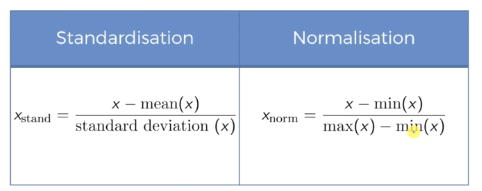

* After standardsiation: All values should be between -3, and 3.
* After normalization: All values must be between 0 and 1.

* **Standardisation:** Will always be good.
* **Normalization:** When in most of your features you have normal distribution.

Therefore, Standardisation will always do some relevant feature scaling which will improve your training process in return.

**You don't have to feature scale your dummy variables, especially if you are doing standardization** because:
1. You already have your variables in the range `[-3, 3]`
2. If you did this, you will lose the interpretation of the categories you encoded which could even make your training performance worse, or at least don't do enough improving in performance.

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# we will only apply the mean and standard deviation obtained from the training
# set to the test set. No need to fit again because that is how our model is
# supposed to work on reality on something it has never seen before
X_test[:, 3:] = sc.transform(X_test[:, 3:])
# note that we have used the same sc which has been fitted on the training set
# so the mean and standard deviation values are those of the training set

In [50]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [51]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
